In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
loan = pd.read_csv ('loan_prediction.csv')

In [4]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


There are some missing values... which we have to deal with, we will do it later, let's check the values they hold

In [5]:
loan.head().T

,0,1,2,3,4
Loan_ID,LP001002,LP001003,LP001005,LP001006,LP001008
Gender,Male,Male,Male,Male,Male
Married,No,Yes,Yes,Yes,No
Dependents,0,1,0,0,0
Education,Graduate,Graduate,Graduate,Not Graduate,Graduate
Self_Employed,No,No,Yes,No,No
ApplicantIncome,5849,4583,3000,2583,6000
CoapplicantIncome,0.0,1508.0,0.0,2358.0,0.0
LoanAmount,NaN,128.0,66.0,120.0,141.0
Loan_Amount_Term,360.0,360.0,360.0,360.0,360.0


let's remove the loan_id column, as it's no use of us for the prediction of the loan_status

In [6]:
loan.drop('Loan_ID',axis=1,inplace=True)

In [7]:
loan.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [8]:
loan.describe(include=object).T

,count,unique,top,freq
Gender,601,2,Male,489
Married,611,2,Yes,398
Dependents,599,4,0,345
Education,614,2,Graduate,480
Self_Employed,582,2,No,500
Property_Area,614,3,Semiurban,233
Loan_Status,614,2,Y,422


In [9]:
loan.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


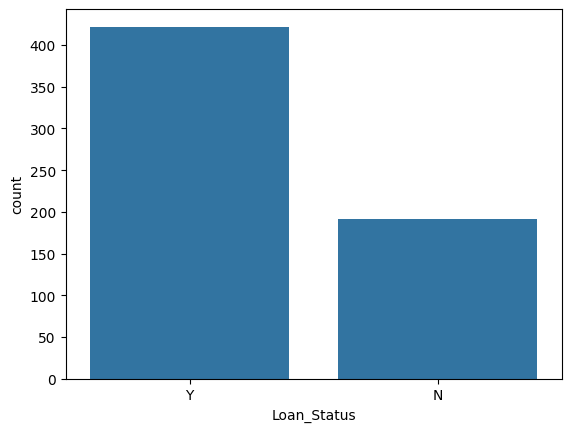

In [10]:
sns.countplot(x='Loan_Status', data=loan)
plt.show()

our dataset is biased to yes statuses of the loan.

<Axes: xlabel='count', ylabel='Gender'>

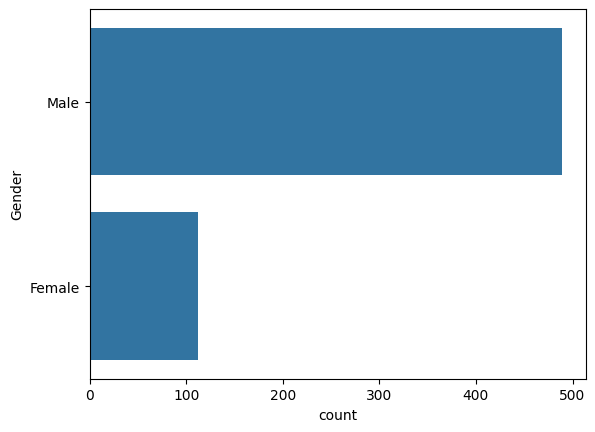

In [11]:
sns.countplot(loan['Gender'])

<Axes: xlabel='count', ylabel='Married'>

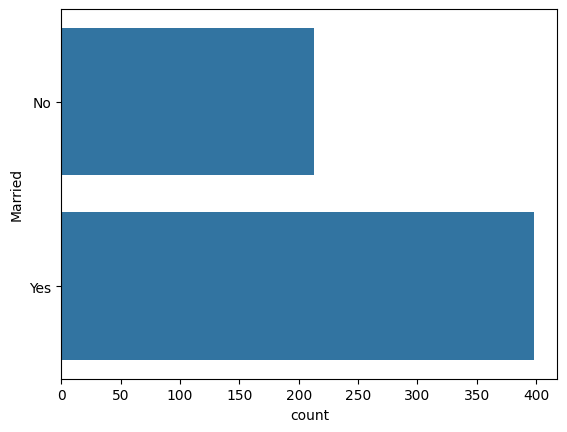

In [12]:
sns.countplot(loan['Married'])

<Axes: xlabel='count', ylabel='Dependents'>

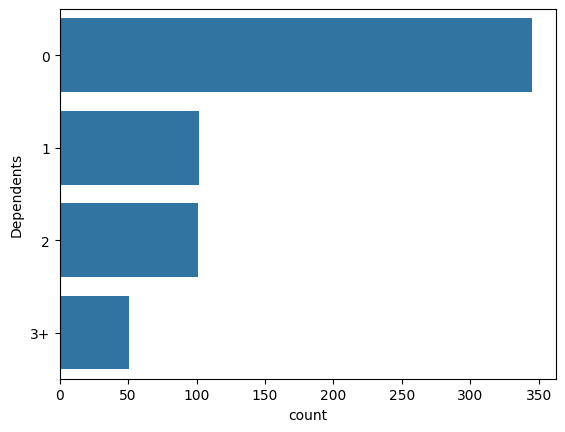

In [13]:
sns.countplot(loan['Dependents'])

<Axes: xlabel='count', ylabel='Education'>

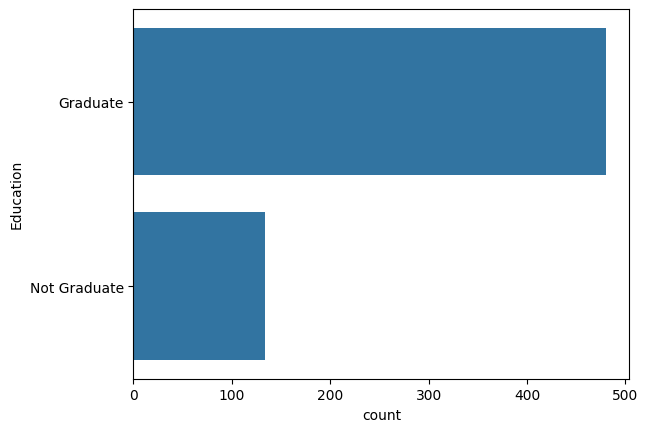

In [14]:
sns.countplot(loan['Education'])

<Axes: xlabel='count', ylabel='Self_Employed'>

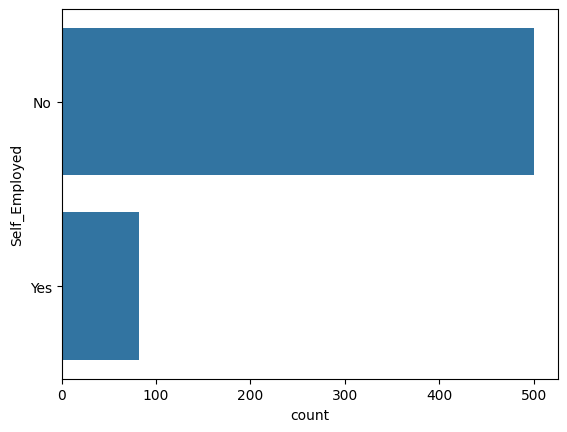

In [15]:
sns.countplot(loan['Self_Employed'])

<Axes: xlabel='count', ylabel='Property_Area'>

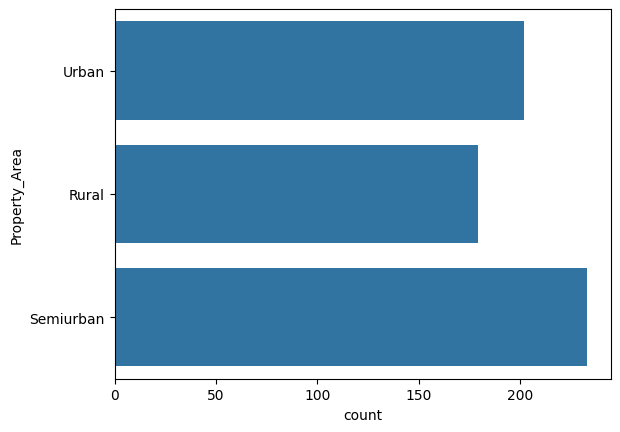

In [16]:
sns.countplot(loan['Property_Area'])

<Axes: xlabel='ApplicantIncome', ylabel='CoapplicantIncome'>

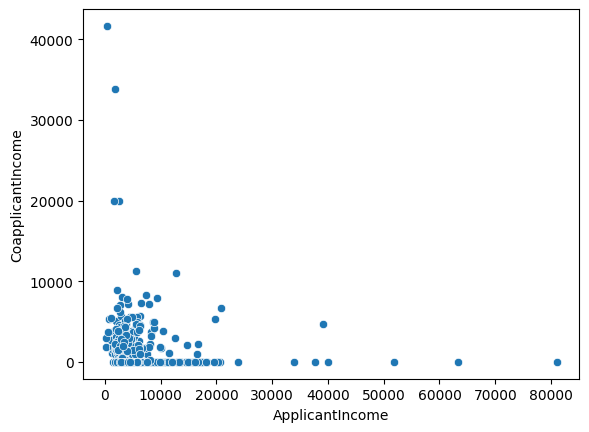

In [17]:
sns.scatterplot(data=loan,x='ApplicantIncome',y='CoapplicantIncome')

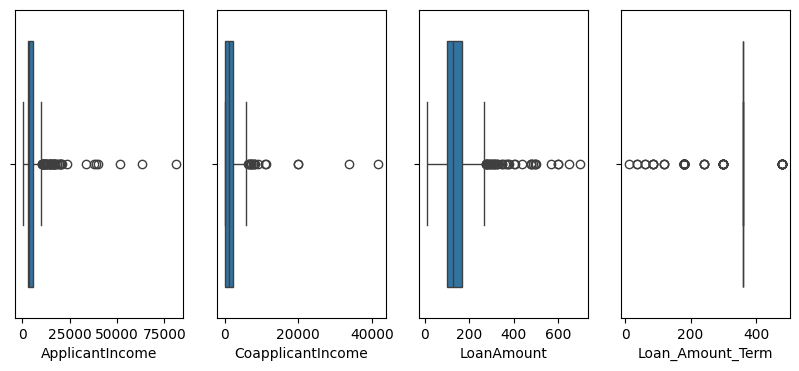

In [18]:
num_cols = loan.select_dtypes(np.number).columns
fig,ax = plt.subplots(1,4,figsize=(10,4))
for i,col in enumerate(num_cols[:-1]):
    sns.boxplot(x=col,data=loan,ax=ax[i])

In [19]:
loan_df = pd.DataFrame()
for cols in num_cols[:-1]:
    loan_df[cols] = np.log1p(loan[cols])

In [20]:
from sklearn.preprocessing import  RobustScaler

mm = RobustScaler()
loan_df[num_cols[:-1]] = mm.fit_transform(loan_df[num_cols[:-1]])

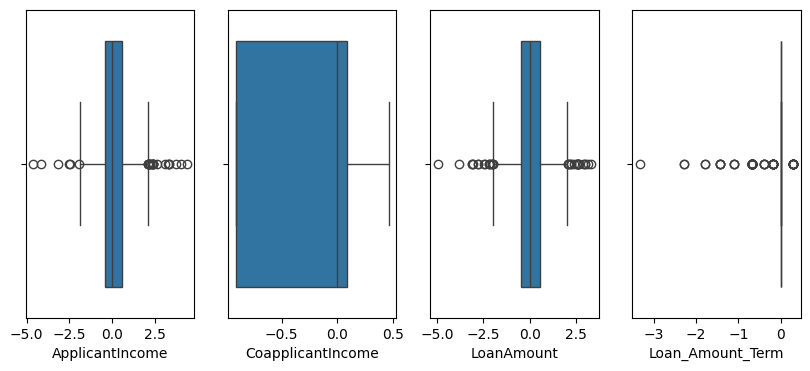

In [21]:
fig,ax = plt.subplots(1,4,figsize=(10,4))
for i,col in enumerate(num_cols[:-1]):
    sns.boxplot(x=col,data=loan_df,ax=ax[i])

In [22]:
loan[num_cols[:-1]] = loan_df[num_cols[:-1]]

In [23]:
loan['Credit_History'].value_counts()

Credit_History
1.0    475
0.0     89
Name: count, dtype: int64

<Axes: xlabel='ApplicantIncome', ylabel='Credit_History'>

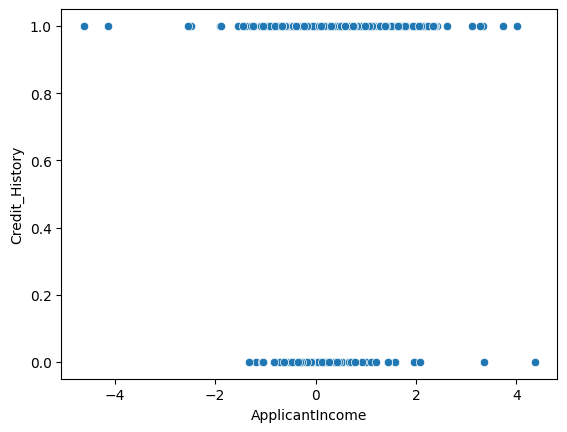

In [24]:
sns.scatterplot(data=loan,x='ApplicantIncome',y='Credit_History')

In [25]:
loan['Loan_Status'] = loan['Loan_Status'].map({'Y':1,'N':0})

In [26]:
num_cols = loan.select_dtypes(include=np.number).columns
for col in num_cols:
    loan[col] = loan[col].fillna(loan[col].median())

cat_cols = loan.select_dtypes(include='object').columns
for col in cat_cols:
    loan[col] = loan[col].fillna(loan[col].mode()[0])

print(loan.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [27]:
label_cols = ['Gender', 'Married', 'Education', 'Self_Employed']
onehot_cols =['Dependents', 'Property_Area']

In [28]:
for col in label_cols:
    print(f"{col} unique types: {loan[col].apply(type).unique()}")
for col in onehot_cols:
    print(f"{col} unique types: {loan[col].apply(type).unique()}")

Gender unique types: [<class 'str'>]
Married unique types: [<class 'str'>]
Education unique types: [<class 'str'>]
Self_Employed unique types: [<class 'str'>]
Dependents unique types: [<class 'str'>]
Property_Area unique types: [<class 'str'>]


In [29]:
from sklearn.preprocessing import LabelEncoder


for col in label_cols:
    le = LabelEncoder()
    loan[col] = le.fit_transform(loan[col])

loan = pd.get_dummies(loan, columns=['Dependents', 'Property_Area'], drop_first=True)

<Axes: >

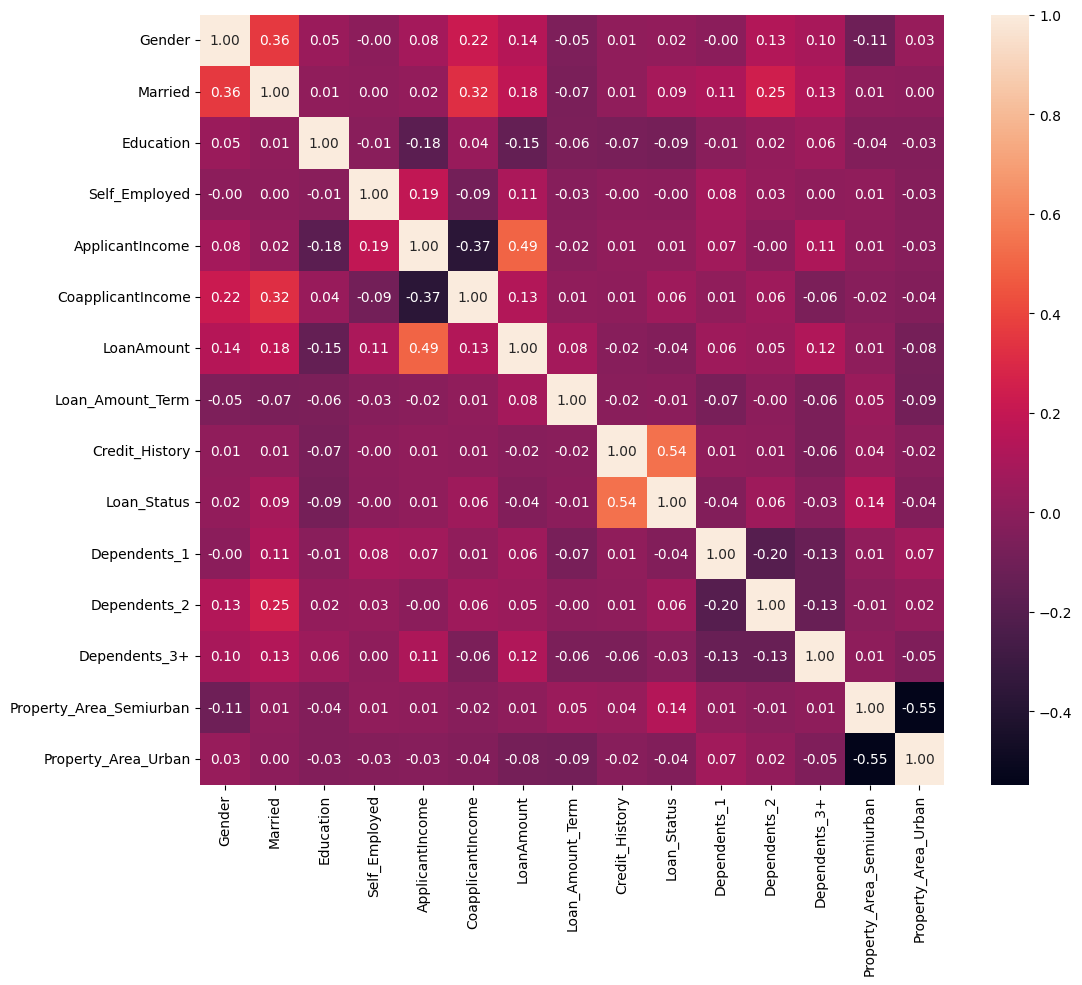

In [30]:
plt.figure(figsize=(12,10))
sns.heatmap(loan.corr(numeric_only=True),annot=True,fmt='.2f')

In [31]:
from sklearn.model_selection import train_test_split

X = loan.drop('Loan_Status', axis=1)
y = loan['Loan_Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [32]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [33]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_scaled, y_train)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# List of models for easy iteration
models = [
    ('Logistic Regression', LogisticRegression()),
    ('KNN', KNeighborsClassifier()),
    ('SVC', SVC()),
    ('Decision Tree', DecisionTreeClassifier()),
    ('Random Forest', RandomForestClassifier()),
    ('Gradient Boosting', GradientBoostingClassifier()),
    ('AdaBoost', AdaBoostClassifier()),
    ('Bagging', BaggingClassifier()),
    ('GaussianNB', GaussianNB()),
    ('XGBoost', XGBClassifier(use_label_encoder=False, eval_metric='logloss')),
    ('LightGBM', LGBMClassifier(verbose=-1))
]

In [35]:
import warnings
warnings.filterwarnings("ignore")

In [36]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

results = []

for name, model in models:
    model.fit(X_train_bal, y_train_bal)
    y_pred = model.predict(X_test_scaled)

    acc = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred, output_dict=False)
    matrix = confusion_matrix(y_test, y_pred)
    
    results.append((name, acc, report, matrix))
    print(f"{name}: Accuracy = {acc:.4f}")
    print("Classification Report:")
    print(report)
    print("Confusion Matrix:")
    print(matrix)
    print('\n')
    print("-" * 50)
    print('\n')

# Create DataFrame with all results
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Classification Report', 'Confusion Matrix'])
#print(results_df)

Logistic Regression: Accuracy = 0.8117
Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.75      0.71        48
           1       0.88      0.84      0.86       106

    accuracy                           0.81       154
   macro avg       0.78      0.79      0.79       154
weighted avg       0.82      0.81      0.81       154

Confusion Matrix:
[[36 12]
 [17 89]]


--------------------------------------------------


KNN: Accuracy = 0.7273
Classification Report:
              precision    recall  f1-score   support

           0       0.56      0.58      0.57        48
           1       0.81      0.79      0.80       106

    accuracy                           0.73       154
   macro avg       0.68      0.69      0.69       154
weighted avg       0.73      0.73      0.73       154

Confusion Matrix:
[[28 20]
 [22 84]]


--------------------------------------------------


SVC: Accuracy = 0.7727
Classification Report:
        

In [37]:
results_df[results_df['Model']=='GaussianNB']

,Model,Accuracy,Classification Report,Confusion Matrix
8,GaussianNB,0.831169,precision recall f1-score ...,"[[28, 20], [6, 100]]"


In [38]:
print(results_df[results_df['Model']=='GaussianNB']['Classification Report'])

8                  precision    recall  f1-score   ...
Name: Classification Report, dtype: object


This is the highest accuracy model among all, let's do hyperparameter tuning

In [39]:
np.logspace(-14, -9, 7)

array([1.00000000e-14, 6.81292069e-14, 4.64158883e-13, 3.16227766e-12,
       2.15443469e-11, 1.46779927e-10, 1.00000000e-09])

In [40]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'var_smoothing': np.logspace(-14, -9, 7)
}

gnb = GaussianNB()
grid_search = GridSearchCV(gnb, param_grid, cv=2, scoring='accuracy')
grid_search.fit(X_train_bal, y_train_bal)

print("Best Parameters:", grid_search.best_params_)
print("Best Cross-Validated Accuracy:", grid_search.best_score_)

Best Parameters: {'var_smoothing': np.float64(1e-14)}
Best Cross-Validated Accuracy: 0.7072784810126582


In [41]:
best_gnb = grid_search.best_estimator_

In [42]:
y_pred = best_gnb.predict(X_test_scaled)

In [43]:

print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8311688311688312
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.58      0.68        48
           1       0.83      0.94      0.88       106

    accuracy                           0.83       154
   macro avg       0.83      0.76      0.78       154
weighted avg       0.83      0.83      0.82       154

Confusion Matrix:
 [[ 28  20]
 [  6 100]]


well no change in accuracy, report as well as matrix due to the working of the variance smoothing, which adds the term

variance_smoothed = variance + var_smoothing

to avoid zero probabilities

so according to our best parameter, 1e-14 is the very nearest to zero than other values, which is not affecting the smoothening of variance, in simpler words there is no effect of hyperparameter tuning!

In [ ]:
rf_baseline = RandomForestClassifier(random_state=42)
rf_baseline.fit(X_train, y_train)
y_pred_baseline = rf_baseline.predict(X_test)


In [48]:
confusion_matrix(y_pred_baseline, y_test)

array([[ 30,   6],
       [ 18, 100]])

In [51]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', 0.8], # 'sqrt' is default for classification
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model from the grid search
best_rf_grid = grid_search.best_estimator_
y_pred_grid = best_rf_grid.predict(X_test)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits

Best parameters found by GridSearchCV:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [66]:
param_grid = {
    'n_estimators': [32,34,35,36,37],
    'max_depth': [None],
    'min_samples_split': [2],
    'min_samples_leaf': [4],
    'max_features': ['sqrt'], # 'sqrt' is default for classification
}

grid_search = GridSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_grid=param_grid,
    cv=5, 
    n_jobs=-1, 
    verbose=2, 
    scoring='accuracy'
)

grid_search.fit(X_train, y_train)

print("\nBest parameters found by GridSearchCV:")
print(grid_search.best_params_)

# Evaluate the best model from the grid search
best_rf_grid = grid_search.best_estimator_
y_pred_grid = best_rf_grid.predict(X_test)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Best parameters found by GridSearchCV:
{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 35}


In [67]:
print("\n--- GridSearchCV Tuned Model Performance ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred_grid):.6f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred_grid))
print("\nconfusion_matrix:\n", confusion_matrix(y_test, y_pred_grid))


--- GridSearchCV Tuned Model Performance ---
Accuracy: 0.857143

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.56      0.71        48
           1       0.83      0.99      0.91       106

    accuracy                           0.86       154
   macro avg       0.90      0.78      0.81       154
weighted avg       0.87      0.86      0.84       154


confusion_matrix:
 [[ 27  21]
 [  1 105]]


In [ ]:
#results of guassianNB
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Test Accuracy: 0.8311688311688312
Classification Report:
               precision    recall  f1-score   support

           0       0.82      0.58      0.68        48
           1       0.83      0.94      0.88       106

    accuracy                           0.83       154
   macro avg       0.83      0.76      0.78       154
weighted avg       0.83      0.83      0.82       154

Confusion Matrix:
 [[ 28  20]
 [  6 100]]


In [69]:
'we will prefer tuned random forest in the pipeline'

'we will prefer tuned random forest in the pipeline'

# making pipeline

In [77]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

In [74]:
try:
    df = pd.read_csv('loan_prediction.csv')
except FileNotFoundError:
    print('File not found error')
    exit()

df.drop('Loan_ID',axis=1,inplace=True)
X = df.drop('Loan_Status', axis=1)
y = df['Loan_Status'].map({'Y': 1, 'N': 0})

In [75]:
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns
print(f"Identified {len(numerical_features)} numerical features and {len(categorical_features)} categorical features.")


Identified 5 numerical features and 6 categorical features.


In [78]:
numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [79]:
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [80]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ])

In [ ]:
model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    #trained and tuned already
    ('classifier', RandomForestClassifier(max_depth= None,
                                          max_features= 'sqrt', 
                                          min_samples_leaf= 4, 
                                          min_samples_split= 2, 
                                          n_estimators= 35))
])

In [88]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [89]:
model_pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area'],
      dtype='object'))])),
                ('classifier',
                 RandomForestClassifier(min_samples_leaf=4, n_estimators=35))])

In [90]:
accuracy = model_pipeline.score(X_test, y_test)
print(f"Model accuracy on the test set: {accuracy:.4f}")


Model accuracy on the test set: 0.8618


In [91]:
import joblib

In [92]:
output_filename = 'loan_prediction_pipeline.joblib'
joblib.dump(model_pipeline, output_filename)
print(f"\nModel pipeline saved to '{output_filename}'")


Model pipeline saved to 'loan_prediction_pipeline.joblib'
